# Cene energijskih virov

## Elektrika:

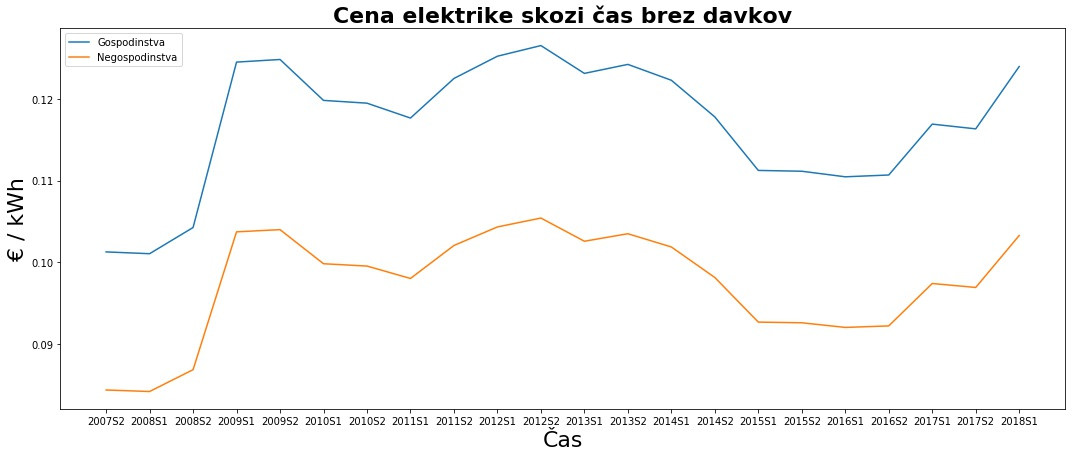

In [1]:
from pandas.compat import StringIO
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
%config InlineBackend.figure_format = 'jpg'
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt

    
np.set_printoptions(suppress=True)

EleCostForHouseHold = np.loadtxt('Podatki/Cene energijskih virov/Cene elektrike za gospodinstva.csv', dtype=np.str, delimiter=",", skiprows=1, encoding='utf-8')
EleCostForHouseHoldNoTL = EleCostForHouseHold[EleCostForHouseHold[:,5] == "Excluding taxes and levies"]
EleCostForHouseHoldNoTL = EleCostForHouseHoldNoTL[:,0::7]
time,countT = np.unique(EleCostForHouseHoldNoTL[:,0], return_counts=True)

i = 0
meanEleCostForHouseHoldNoTL = np.array([])
for t in time:
    m = EleCostForHouseHoldNoTL[EleCostForHouseHoldNoTL[:,0] == np.str(t), 1].astype(np.float)
    mean = np.sum(m)/countT[i]
    i += 1
    meanEleCostForHouseHoldNoTL = np.append(meanEleCostForHouseHoldNoTL, mean)
    
EleCostForNotHouseHold = np.loadtxt('Podatki/Cene energijskih virov/Cene elektrike za negospodinstva.csv', dtype=np.str, delimiter=",", skiprows=1, encoding='utf-8')
EleCostForNotHouseHoldNoTL = EleCostForNotHouseHold[(EleCostForNotHouseHold[:,5] == "Excluding taxes and levies") * (EleCostForNotHouseHold[:,3] != "Band IG : Consumption > 150 000 MWh")]
EleCostForNotHouseHoldNoTL = EleCostForNotHouseHoldNoTL[:,0::7]
time,countT = np.unique(EleCostForNotHouseHoldNoTL[:,0], return_counts=True)

i = 0
meanEleCostForNotHouseHoldNoTL = np.array([])
for t in time:
    m = EleCostForHouseHoldNoTL[EleCostForHouseHoldNoTL[:,0] == np.str(t), 1].astype(np.float)
    mean = np.sum(m)/countT[i]
    i += 1
    meanEleCostForNotHouseHoldNoTL = np.append(meanEleCostForNotHouseHoldNoTL, mean)

fontL = {'size'   : 22}
fontT = {'weight' : 'bold',
        'size'   : 22}
plt.figure(figsize=(18,7))
plt.ylabel('€ / kWh', fontL)
plt.xlabel('Čas', fontL)
plt.title('Cena elektrike skozi čas brez davkov', fontT)
EleCostForHouseHoldNoTL = plt.plot(time, meanEleCostForHouseHoldNoTL)
EleCostForNotHouseHoldNoTL = plt.plot(time, meanEleCostForNotHouseHoldNoTL) 
legendForEleCostNoTL = plt.legend(['Gospodinstva', 'Negospodinstva'], loc='upper left')
            


# # Plin

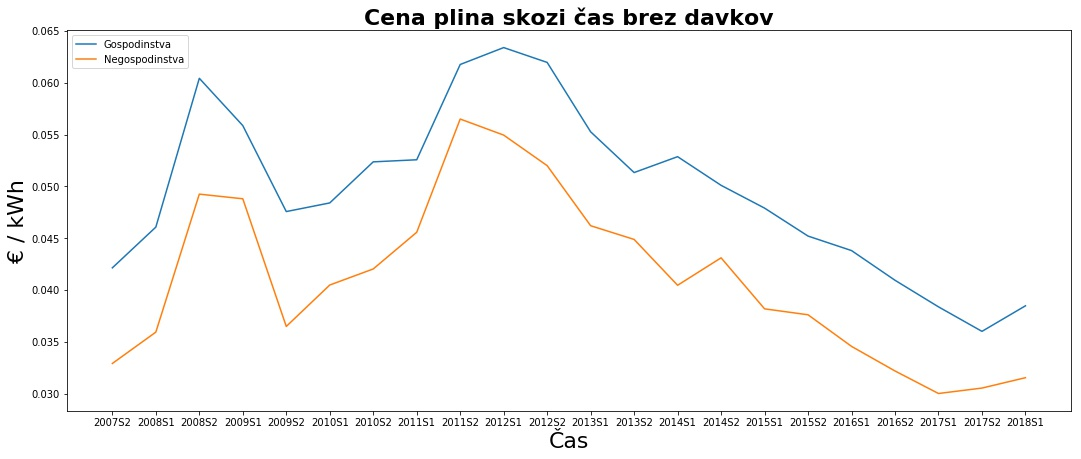

In [26]:
nGasCostForHouseHold = np.loadtxt('Podatki/Cene energijskih virov/Cene plina za gospodinstva.csv', dtype=np.str, delimiter=",", skiprows=1, encoding='utf-8')
nGasCostForHouseHoldNoTL = nGasCostForHouseHold[nGasCostForHouseHold[:,5] == "Excluding taxes and levies"]
nGasCostForHouseHoldNoTL = nGasCostForHouseHoldNoTL[:,0::7]
time,countT = np.unique(nGasCostForHouseHoldNoTL[:,0], return_counts=True)

i = 0
meanGasCostForHouseHoldNoTL = np.array([])
for t in time:
    m = nGasCostForHouseHoldNoTL[nGasCostForHouseHoldNoTL[:,0] == np.str(t), 1].astype(np.float)
    mean = np.sum(m)/countT[i]
    i += 1
    meanGasCostForHouseHoldNoTL = np.append(meanGasCostForHouseHoldNoTL, mean)
    
nGasCostForNotHouseHold = np.loadtxt('Podatki/Cene energijskih virov/Cene plina za negospodinstva.csv', dtype=np.str, delimiter=",", skiprows=1, encoding='utf-8')
nGasCostForNotHouseHoldNoTL = nGasCostForNotHouseHold[nGasCostForNotHouseHold[:,5] == "Excluding taxes and levies"]
nGasCostForNotHouseHoldNoTL = nGasCostForNotHouseHoldNoTL[:,0::7]
nGasCostForNotHouseHoldNoTL = nGasCostForNotHouseHoldNoTL[nGasCostForNotHouseHoldNoTL[:,1] != ":"]
time,countT = np.unique(nGasCostForNotHouseHoldNoTL[:,0], return_counts=True)

i = 0
meanGasCostForNotHouseHoldNoTL = np.array([])
for t in time:
    m = nGasCostForNotHouseHoldNoTL[nGasCostForNotHouseHoldNoTL[:,0] == np.str(t), 1].astype(np.float)
    mean = np.sum(m)/countT[i]
    i += 1
    meanGasCostForNotHouseHoldNoTL = np.append(meanGasCostForNotHouseHoldNoTL, mean)
    
plt.figure(figsize=(18,7))
plt.ylabel('€ / kWh', fontL)
plt.xlabel('Čas', fontL)
plt.title('Cena plina skozi čas brez davkov', fontT)
nGasEleCostForHouseHoldNoTL = plt.plot(time, meanGasCostForHouseHoldNoTL)
nGasCostForNotHouseHoldNoTL = plt.plot(time, meanGasCostForNotHouseHoldNoTL) 
legendForGasCostNoTL = plt.legend(['Gospodinstva', 'Negospodinstva'], loc='upper left')

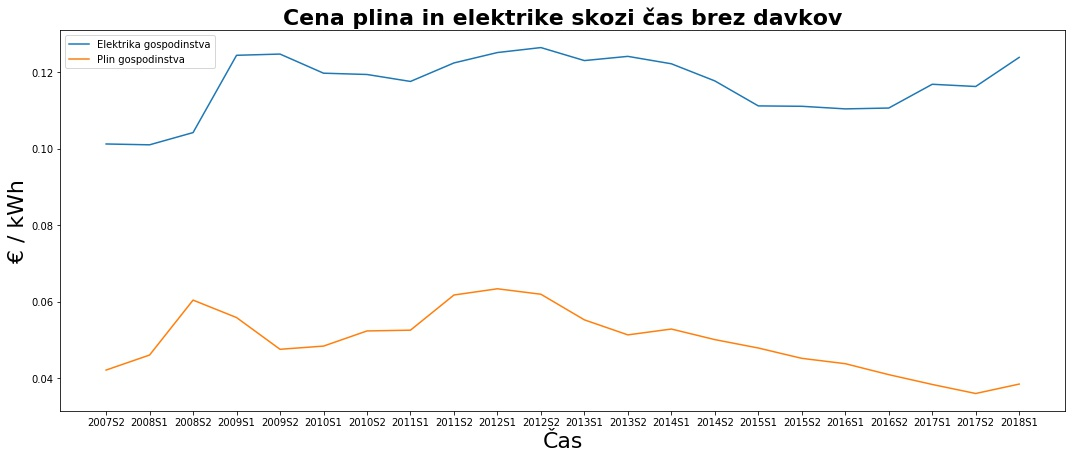

In [30]:
plt.figure(figsize=(18,7))
plt.ylabel('€ / kWh', fontL)
plt.xlabel('Čas', fontL)
plt.title('Cena plina in elektrike skozi čas brez davkov', fontT)
allEnergyCosts = plt.plot(time, meanEleCostForHouseHoldNoTL, time, meanGasCostForHouseHoldNoTL)
legendForGasCostNoTL = plt.legend(['Elektrika gospodinstva', 'Plin gospodinstva'], loc='upper left')